# Abstracto
Según la Organización Mundial de la Salud (OMS), el accidente cerebrovascular 	es la segunda causa de muerte en todo el mundo, responsable de 	aproximadamente el 11% del total de muertes. 

Tan solo en 2016, se registraron 398.000 muertes, donde 72% de los fallecidos fueron hombres. Estas cifras demostraron un aumento de casos del 19% con respecto al año 2000. Sin embargo, el dato mas alarmante es que el 80% de los accidentes cerebrovasculares eran prevenibles. 

Este conjunto de datos se utilizará para predecir si es probable que un paciente sufra un accidente cerebrovascular en función de los parámetros de entrada como la edad, tipo de trabajo, residencia, diversas condiciones médicas, enfermedades y el tabaquismo. Cada fila de los datos proporciona información relevante sobre el paciente.

La motivación del presente proyecto, es aportar a la comunidad médica y científica en la prevención de accidentes cerebrovasculares. Este a su vez, servirá de utilidad para la toma de decisiones médicas y la elaboración de políticas públicas destinadas a promover la preservación de la salud en cualquier población.

# 1) Presentación del problema específico

La falta de una herramienta realizada con evidencia basada en datos, que permita detectar anticipadamente y de manera confiable, la posibilidad de sufrir accidentes cerebrovasculares.

# 2) Objetivos de la investigación

- Explorar y transformar eficientemente los datos recopilados, orientados a resolver el problema en cuestión. 

- Determinar si existe o no relación entre los factores de riesgo y el hecho de sufrir un accidente cerebrovascular.

- Aportar un modelo capaz de predecir con efectividad la posibilidad de sufrir accidentes cerebrovasculares, a través de el perfilado de un determinado conjunto de datos de cada paciente. 

# 3) Preguntas de investigación

a) ¿Cuales son los síntomas más frecuentes de los pacientes que han sufrido un accidente cerebrovascular? 

b) ¿La combinación de los factores de riesgo, puede aumentar la posibilidad de padecer un accidente cerebrovascular? 

c) ¿Cuál es la edad promedio de las personas que sufrieron un accidente cerebrovascular?




# 4) Data Acquisition

Es el proceso mediante el cual adquirimos los datos de la fuente, para luego procesarlos y trabajar con ellos. Para lograrlo, primero importamos las librerías necesarias: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Visualizacion de Datos
import matplotlib.patches as mpatches
import seaborn as sns


A continuación realizamos la lectura del dataframe:


In [2]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data (1).csv')
df

,id,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9146,67.0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,61.0,1,1,Self-employed,Rural,212.21,NaN,never smoked,1
2,31112,81.0,1,1,Private,Rural,115.92,32.5,never smoked,1
3,61182,49.0,1,1,Private,Urban,171.23,34.4,smokes,1
4,1665,79.0,1,1,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,Private,Urban,83.75,NaN,never smoked,1
5106,44873,81.0,0,0,Self-employed,Urban,125.20,40.0,never smoked,1
5107,19723,35.0,0,0,Self-employed,Rural,82.99,30.6,never smoked,1
5108,37544,51.0,0,0,Private,Rural,166.29,25.6,formerly smoked,1


# 5) Análisis Exploratorio de Datos (EDA)

Este proceso nos permite analizar e investigar conjuntos de datos y resumir sus principales características, para luego presentarlos mediante métodos de visualización de datos.

Verificamos la Dimensión del dataset:


In [3]:
print(df.shape)
print(pd.value_counts(df['stroke'], sort = True)) 

(5110, 10)
0    2668
1    2442
Name: stroke, dtype: int64


Verificamos los tipos de datos en cada columna:

In [4]:
df.dtypes

id                     int64
age                  float64
hypertension           int64
heart_disease          int64
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Verficamos si existen valores nulos:

In [5]:
total_nan_values = df.isnull().sum().sum()
print (total_nan_values) 

201


Realizamos un análisis de valores nulos por columnas:

In [6]:
df.isnull().sum() 

id                     0
age                    0
hypertension           0
heart_disease          0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Mostramos Información de estadística descriptiva:

In [7]:
df.describe(include='all')  

,id,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,NaN,NaN,NaN,5,2,NaN,NaN,4,NaN
top,NaN,NaN,NaN,NaN,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,NaN,NaN,NaN,2925,2596,NaN,NaN,1892,NaN
mean,36560.395108,43.275597,0.497847,0.474951,NaN,NaN,106.740534,28.938867,NaN,0.477886
std,21167.538075,22.619207,0.500044,0.499421,NaN,NaN,45.570246,7.856137,NaN,0.499560
min,67.000000,0.080000,0.000000,0.000000,NaN,NaN,55.120000,11.300000,NaN,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,NaN,NaN,91.900000,28.100000,NaN,0.000000
75%,54682.000000,61.000000,1.000000,1.000000,NaN,NaN,116.372500,33.100000,NaN,1.000000


# 6) Data Wrangling

Es el proceso de reunir datos de una o varias fuentes y prepararlos y limpiarlos para facilitar el acceso a la información y la realización del análisis.


Primero, especificamos el significado de cada variable del dataset y las traducimos:

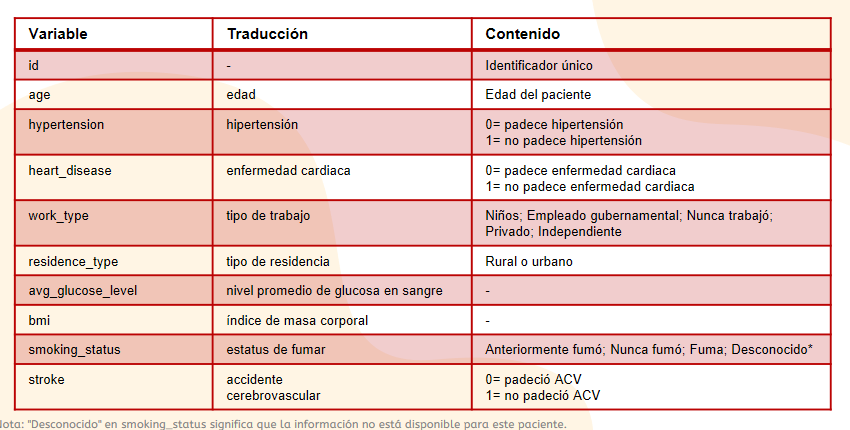


## Eliminamos la columna ID:

In [8]:
del df['id']

## Realizamos el renombrado de las columnas para facilitar el análisis:

In [9]:

name_labels={
  
    'age' : 'edad',
    'hypertension' : 'hipertensión',
    'heart_disease' : 'enfermo_cardíaco',
    'work_type' : 'tipo_trabajo',
    'Residence_type' : 'tipo_residencia',
    'avg_glucose_level' : 'nivel_promedio_glucosa_en_sangre',
    'smoking_status' : 'fumador',
    'bmi' : 'masa_corporal',
    'stroke' : 'accidente_cerebrovascular'
}

df_labeled = df.rename(columns=name_labels).copy()

## Mostramos más información sobre nuestro dataframe inicial:

In [10]:
df_labeled.info

<bound method DataFrame.info of       edad  hipertensión  enfermo_cardíaco   tipo_trabajo tipo_residencia  \
0     67.0             1                 1        Private           Urban   
1     61.0             1                 1  Self-employed           Rural   
2     81.0             1                 1        Private           Rural   
3     49.0             1                 1        Private           Urban   
4     79.0             1                 1  Self-employed           Rural   
...    ...           ...               ...            ...             ...   
5105  80.0             1                 0        Private           Urban   
5106  81.0             0                 0  Self-employed           Urban   
5107  35.0             0                 0  Self-employed           Rural   
5108  51.0             0                 0        Private           Rural   
5109  44.0             0                 0       Govt_job           Urban   

      nivel_promedio_glucosa_en_sangre  mas

## Borramos los valores duplicados:

In [11]:
df.duplicated().sum()

0

## A continuación realizamos el Análisis de columnas con porcentaje de nulos:


In [12]:
pd.set_option('display.max_rows', None)  # or 1000
serie=(df_labeled.isnull().sum()/df_labeled.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

masa_corporal    3.933464
dtype: float64

## Graficamos la distribución de la variable masa corporal:

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
serie.plot(kind='bar')

## Importamos la librería missingno para decidir que acción realizar con nuestra variable con datos faltantes:


In [14]:
import missingno as msno
msno.matrix(df_labeled)

## Evaluamos la cantidad de datos nulos antes de tomar una decisión:


In [15]:
 df_labeled.masa_corporal.value_counts(dropna=False)

NaN     201
28.7     41
21.5     39
31.5     38
28.4     38
31.4     37
27.7     37
26.1     37
26.7     37
27.6     37
23.4     36
27.3     36
31.1     35
27.0     35
26.4     34
26.9     34
25.1     34
31.8     34
31.0     33
25.5     33
31.3     33
31.9     32
28.9     31
23.5     31
21.4     31
24.8     31
31.2     31
26.5     30
22.2     30
29.4     30
28.3     30
27.5     29
26.6     29
29.1     29
28.1     29
21.0     29
24.2     29
21.3     29
25.3     28
32.3     28
21.1     28
28.0     28
24.1     28
31.7     28
24.0     28
27.1     28
27.9     28
21.8     27
23.0     27
31.6     27
28.5     27
29.7     27
26.2     27
24.9     27
28.6     27
25.0     27
29.6     26
28.8     26
29.0     26
24.3     26
24.5     26
25.4     26
29.9     26
29.2     26
29.5     26
32.8     25
22.7     25
28.2     25
22.8     25
26.0     25
33.1     25
25.9     24
35.8     24
23.6     24
32.1     24
27.2     24
23.9     24
25.8     24
27.8     23
33.5     23
24.4     23
26.3     23
29.8     23
23.8

In [16]:
df_labeled.masa_corporal.value_counts(dropna=False, normalize= True)

NaN     0.039335
28.7    0.008023
21.5    0.007632
31.5    0.007436
28.4    0.007436
31.4    0.007241
27.7    0.007241
26.1    0.007241
26.7    0.007241
27.6    0.007241
23.4    0.007045
27.3    0.007045
31.1    0.006849
27.0    0.006849
26.4    0.006654
26.9    0.006654
25.1    0.006654
31.8    0.006654
31.0    0.006458
25.5    0.006458
31.3    0.006458
31.9    0.006262
28.9    0.006067
23.5    0.006067
21.4    0.006067
24.8    0.006067
31.2    0.006067
26.5    0.005871
22.2    0.005871
29.4    0.005871
28.3    0.005871
27.5    0.005675
26.6    0.005675
29.1    0.005675
28.1    0.005675
21.0    0.005675
24.2    0.005675
21.3    0.005675
25.3    0.005479
32.3    0.005479
21.1    0.005479
28.0    0.005479
24.1    0.005479
31.7    0.005479
24.0    0.005479
27.1    0.005479
27.9    0.005479
21.8    0.005284
23.0    0.005284
31.6    0.005284
28.5    0.005284
29.7    0.005284
26.2    0.005284
24.9    0.005284
28.6    0.005284
25.0    0.005284
29.6    0.005088
28.8    0.005088
29.0    0.0050

## Decidimos interpolar esta columna, reemplazando por la mediana:

In [17]:
 col_inter= ['masa_corporal']

In [18]:
for i in col_inter: 
  df_labeled[i] = df_labeled[i].fillna(df_labeled[i].median())

## Verificamos que el reemplazo de valores se ha realizado correctamente:

In [19]:
df_labeled.masa_corporal.isnull().sum() 

0

## Mostramos las Medidas de tendencia central de nuestro dataframe modificado:

In [20]:
df_labeled.describe().T 

,count,mean,std,min,25%,50%,75%,max
edad,5110.0,43.275597,22.619207,0.08,25.000,45.0,61.0000,82.00
hipertensión,5110.0,0.497847,0.500044,0.00,0.000,0.0,1.0000,1.00
enfermo_cardíaco,5110.0,0.474951,0.499421,0.00,0.000,0.0,1.0000,1.00
nivel_promedio_glucosa_en_sangre,5110.0,106.740534,45.570246,55.12,77.245,91.9,116.3725,271.74
masa_corporal,5110.0,28.905871,7.701774,11.30,23.800,28.1,32.8000,97.60
accidente_cerebrovascular,5110.0,0.477886,0.499560,0.00,0.000,0.0,1.0000,1.00


# 7)  Graficación de los datos

Primero buscamos la Correlación entre las variables:

In [21]:
plt.figure(dpi = 90,figsize= (10,8))
mask = np.triu(np.ones_like(df_labeled.corr(),dtype = bool))
sns.heatmap(df_labeled.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'Blues')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Mapa de Calor de Correlación entre variables')
plt.show()

El gráfico de heatmap, nos muestra que las variables que tienen mayor relación con nuestra variable objetivo "accidente_cerebrovaacular" son "hipertensión", "enfermo_cardiaco"; seguidas de "nivel_promedio_glucosa_en_sangre", "edad" y "masa_corporal" en menor proporción.

## Análisis Univariado

In [22]:
plt.figure(dpi = 100,figsize= (10,8))
sns.boxplot(data=df_labeled.nivel_promedio_glucosa_en_sangre, orient="v",palette="Pastel2")
plt.title('Gráfico boxplot del nivel promedio glucosa en sangre')
plt.show()


En el gráfico de boxplot podemos ver como se distribuye la variable nivel promedio de glucosa en sangre, donde la dimensión de la caja está determinada por la distancia del rango intercuartílico. Es decir, en nuestro gráfico vemos que, el 50% de los datos están entre 75 y 100 mg/dl. 
La mediana corta la caja en dos lados desiguales, demostrando asimetría positiva o segada a la derecha ya que la parte más larga de la caja es la parte superior a la mediana. 

A continuación, los dos segmentos en la caja se denominan bigotes (whisker) que determinan el límite para la detección de valores atípicos (outilers en inglés) son aquellos puntos que están mas allá del límite superior de 160mg/dl de glucosa en sangre. Con este gráfico, observamos que en nuestro dataset existe un alto porcentaje de personas con niveles altos de glucosa en sangre, ya que según la OMS los valores normales para este indicador deben estar alrededor de 100mg/dl, se consideran valores altos alrededor de 160mg/dl y gracias a este análisis vemos que existen varios valores atípicos que superan este límite llegando a los 250mg/dl. Esto nos invita a considerar la importancia de esta variable y realizar análisis más profundos.


In [23]:
plt.figure(dpi = 90,figsize= (10,8))
sns.set(style="whitegrid")
sns.violinplot(y='masa_corporal',data=df_labeled,palette="plasma",linewidth = 2)
plt.title('Gráfico de violín de variable masa corporal')
plt.show()

Este gráfico de violín nos indica que la mayor densidad de datos de la variable masa corporal se encuentra alrededor del valor 30 de IMC, lo cual es interesante pues según la OMS  los valores por debajo de 18,5 indican peso insuficiente, entre 18,5 y 25 se consideran normales, de 25 a 30 indica sobrepeso y un IMC mayor a 30 indica obesidad. Este indicador nos sirve como disparador para realizar más adelante comparaciones entre variables y determinar si es un factor determinante en la posibilidad de sufrir accidentes cerebrovasculares.


In [24]:
plt.figure(dpi = 100,figsize= (10,8))
sns.boxplot(data=df_labeled.edad, orient="v")
plt.title('Gráfico boxplot de variable edad')
plt.show()


En este gráfico de boxplot podemos ver como se distribuye la variable edad, donde  la caja demuestra que, el 50% de los datos están entre 25 y 60 años.

La mediana corta la caja en dos lados desiguales, demostrando asimetría negativa o segada a la izquierda ya que la parte más larga de la caja es la parte inferior a la mediana. 

A continuación, los bigotes que determinan el límite para la detección de valores atípicos,  nos indican que en nuestro data set no hay outilers para esta variable. Con este análisis, necsitamos analizar esta variable en contexto con otras para determinar si es un factor determinante, ya que el rango es muy amplio.




## Análisis Bivariado

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(x=df_labeled['accidente_cerebrovascular'],hue='fumador',data=df_labeled)
plt.title('Relación entre los distintos estatus de fumar y si sufrió un accidente crebrovascular', fontsize = 20, fontweight = 30)
plt.xticks([0, 1], ['Sano', 'Enfermo'], rotation=20)
plt.show()

Con este análisis, observamos que dentro de la categoría de pacientes que sufrieron un accidente cerebrovascular la distribución de personas que fuman y fuman frecuentemente es menor a los que nunca fuman, además de existir un elevado número de personas de las cuales se desconoce su estatus de fumador, porque lo que no pareciera haber una relación directa entre esta variable y la posibilidad de sufrir un accidente cerebrovascular. 


In [26]:
plt.figure(figsize=(10,8))
sns.countplot(x=df_labeled['accidente_cerebrovascular'],hue='tipo_trabajo',data=df_labeled)
plt.title('Relación entre los distintos tipos de trabajo y si sufrió un accidente crebrovascular', fontsize = 20, fontweight = 30)
plt.xticks([0, 1], ['Sano', 'Enfermo'], rotation=20)
plt.show()

Con este análisis, observamos que indiferentemente de ser pacientes que sufrieron un accidente cerebrovascular o no , la distribución de personas que trabajan en el ámbito privado es  superior, por lo que emplearse en este ámbito no pareciera presentar una relación directa con la enfermedad. Por otro lado, es interesante el hecho de que, dentro de los entrevistados no existen niños que hayan sufrido esta enfermedad, lo cuál nos resulta un indicador de relevancia de la edad.

In [27]:
plt.figure(figsize=(10,8))
sns.countplot(x=df_labeled['accidente_cerebrovascular'],hue='tipo_residencia',data=df_labeled)
plt.title('Relación entre los distintos tipos de residencia y si sufrió un accidente crebrovascular', fontsize = 20, fontweight = 30)
plt.xticks([0, 1], ['Sano', 'Enfermo'], rotation=20)
plt.show()


Con este gráfico, observamos que en nuestro dataset existe un número mayor de personas que viven en en el área urbana; presentando una ligera diferencia con respecto a los que viven en zonas rurales para la categoría de haber padecido la enfermedad. Con este resultado no pareciera haber una relación directa entre esta variable y la posibilidad de sufrir la enfermedad.


In [28]:
fig, axes= plt.subplots(figsize=(16,8),ncols=2, sharex='all')
sns.histplot(data= df_labeled[df_labeled.accidente_cerebrovascular==0], x='nivel_promedio_glucosa_en_sangre', kde=True, ax= axes[0],color="blue")
axes[0].set_title("Nivel de glucosa sin enfermedad")
sns.histplot(data= df_labeled[df_labeled.accidente_cerebrovascular==1], x='nivel_promedio_glucosa_en_sangre', kde=True, ax=axes[1],color="red")
axes[1].set_title("Nivel de glucosa con enfermedad")
plt.show()

Con estos gráficos comparativos, observamos que para la categoría de personas sanas los niveles promedio de glucosa en sangre se encuentran en su mayoría alrededor de los 100mg/dl (valor considerado dentro del rango normal). Mientras tanto, para la categoría de haber padecido la enfermedad, los datos recopilados se agrupan en su mayoría por debajo de los 100mg/dl y entre los 200 y 250mg/dl (valores considerados dentro del rango normal).Por lo que concluimos que es un factor importante para determinar la posibilidad de sufrir accidentes cerebrovasculares.


## Análisis Multivariado

In [29]:
plt.figure(figsize=(15,12))
sns.scatterplot(x="masa_corporal", y="nivel_promedio_glucosa_en_sangre",hue="accidente_cerebrovascular", data=df_labeled, palette="PuBu")
plt.title('Relacion entre masa corporal, glucosa en sangre y si padeció o no la enfermedad', fontsize = 20, fontweight = 30)
plt.show()

Con este análisis, observamos que la mayoría de los pacientes que sufrieron la enfermedad, presentan niveles promedio de glucosa en sangre muy superiores o por debajo al rango normal; también vemos que hay mas relación con los valores superiores a 20 de IMC. Con lo que concluimos que si un paciente presenta niveles anormales de glucosa en sangre y sobrepeso u obesidad hay más riesgo de padecer la enfermedad. 

In [30]:

plt.figure(figsize=(15,12))
sns.scatterplot(x="edad", y="masa_corporal",hue="enfermo_cardíaco", data=df_labeled,palette="BuPu")
plt.title('Relacion entre edad, masa corporal y si padeció o no del corazón', fontsize = 20, fontweight = 30)
plt.show()

Con este análisis, observamos una relación débil entre la variable masa corporal y la enfermedad. Sin embargo, observamos que la mayoría de los pacientes que sufrieron una enfermedad cardiaca , presentan IMC superiores a 20 y aumentan los casos conforme aumenta la edad. Con esto concluimos mientras aumenta la edad tanto el sobrepeso como la obesidad aumentan el riesgo de sufrir una enfermedad cardiaca .



In [31]:
plt.figure(figsize=(15,12))
sns.scatterplot(x="masa_corporal", y="nivel_promedio_glucosa_en_sangre",hue="hipertensión", data=df_labeled, palette="Dark2")
plt.title('Relacion entre masa corporal, glucosa en sangre y si padeció o no la enfermedad', fontsize = 20, fontweight = 30)
plt.show()

Con este análisis, observamos que la mayoría de los pacientes que sufren la enfermedad, presentan niveles promedio de glucosa en sangre muy superiores o por debajo al rango normal; también vemos que hay mas relación con los valores superiores a 20 de IMC. Con lo que concluimos que si un paciente presenta niveles anormales de glucosa en sangre y sobrepeso u obesidad es mas propenso a padecer hipertensión. 

# 8) Respondiendo las preguntas de investigación:


### *a) ¿Cuales son los síntomas más frecuentes de los pacientes que han sufrido un accidente cerebrovascular?* 

Niveles elevados de Glucosa en sangre; Indice de Masa corporal superior a 30 , es decir problemas de sobrepeso y obesidad.


### *b) ¿La combinación de los factores de riesgo, puede aumentar la posibilidad de padecer un accidente cerebrovascular?* 

El análisis de este dataset, nos demuestra que existe mas frecuencia de casos para las personas que padececieron una enfermedad cardiaca, hipertensión y valores fuera del rango de lo normal de Masa corporal y Glucosa en sangre.


### *c) ¿Cuál es la edad promedio de las personas que sufrieron un accidente cerebrovascular?*

Si bien depende de otros factores como el Indice de Masa corporal y valores regulados de Glucosa en sangre, las gráficas nos demuestran que la mayoría de personas que han sufrido un accidente cerebrovascular se encuentran en torno a los 60 años. Sin embargo, también vemos que hay concurrencia de la enfermedad en las personas entre 70 y 90 años.

# 9) Feature Engineering

Este proceso hace referencia a las técnicas de ingeniería utilizadas para trabajar sobre los atributos del problema que estudiamos, pues hace falta bastante esfuerzo para imaginar cuáles podrían ser los atributos adecuados, crearlos, seleccionarlos, probarlos y transformarlos para hacerlos relevantes y asimilables por nuestros algoritmos.
El trabajo en la elección y la parametrización de los modelos, la medición de los errores de predicción (o de clasificación) y la atenta interpretación de los resultados son tres elementos indisociables de la disciplina llamada Feature Engineering.
La idea general es ajustar y transformar los datos brutos (data) para que nos aporten una mayor información.

Para esto convertimos las variables categóricas utilizando get_dummies:

In [32]:
df_labeled = pd.get_dummies(df_labeled)
df_labeled

Output hidden; open in https://colab.research.google.com to view.

Luego verificamos el estado final de los datos: 

In [34]:
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   edad                              5110 non-null   float64
 1   hipertensión                      5110 non-null   int64  
 2   enfermo_cardíaco                  5110 non-null   int64  
 3   nivel_promedio_glucosa_en_sangre  5110 non-null   float64
 4   masa_corporal                     5110 non-null   float64
 5   accidente_cerebrovascular         5110 non-null   int64  
 6   tipo_trabajo_Govt_job             5110 non-null   uint8  
 7   tipo_trabajo_Never_worked         5110 non-null   uint8  
 8   tipo_trabajo_Private              5110 non-null   uint8  
 9   tipo_trabajo_Self-employed        5110 non-null   uint8  
 10  tipo_trabajo_children             5110 non-null   uint8  
 11  tipo_residencia_Rural             5110 non-null   uint8  
 12  tipo_r

# 10)  Modelos de Machine Learning

Son modelos de aprendizaje automático que mediante un algoritmo analizan datos, para encontrar patrones o hacer predicciones. Existen varios tipos pero elegiremos un modelo de tipo clasificatorio para nuestro proyecto.

>A modo de introducción, explicaremos los conceptos a utilizar:



### -Matriz de confusión: 
Es una herramienta que permite analizar los resultados de cómo trabaja un algoritmo de aprendizaje supervisado. Esta matriz se presenta siempre en forma de tabla, de manera que en cada columna aparece el número de predicciones de cada clase, mientras que cada fila muestra el número real de instancias de cada clase.

Cuando las clases de salida son más de una, se puede usar la medición de la confusión para resolver los problemas de clasificación del aprendizaje de la máquina. La tabla de la matriz de confusión incluye cuatro combinaciones diferentes de valores reales y previstos. Puede usar esta técnica para medir la especificidad, la precisión, la memoria, la exactitud y el tema que discutimos hoy, la curva AUC y ROC. Entendamos los términos que contiene la matriz de confusión usando el ejemplo del embarazo:

-Verdadero Positivo
La interpretación del verdadero positivo es que usted predice el positivo, y es una declaración verdadera. Por ejemplo, una mujer está embarazada, y tú predices lo mismo.

-Negativo verdadero
La interpretación de la verdadera negativa es que usted predice la negativa, y es una declaración verdadera. Por ejemplo, un hombre no está embarazado, y tú predices lo mismo.

-Falso positivo
La interpretación falso-positivo es que usted predice el positivo, y no es una declaración verdadera. Por ejemplo, un hombre no está embarazado, pero usted predice que lo está. Esta predicción es un error de tipo 1.

-Falso Negativo
La verdadera interpretación negativa es que usted predice lo negativo, y no es una declaración verdadera. Por ejemplo, una mujer no está embarazada, pero usted predice que está embarazada. Esta predicción es un error de tipo 2.
Debes recordar que los valores reales son verdaderos y falsos, y los valores que predices son positivos y negativos

Es decir, esta matriz pone en relación las predicciones realizadas por un algoritmo de aprendizaje supervisado y los resultados correctos que debería haber mostrado. Así puede medirse el mayor o menor desempeño del mismo, determinando qué tipo de errores y de aciertos tiene cada modelo a la hora de pasar por un proceso de aprendizaje sobre datos propuestos.


###-Curva AUC-ROC:
La curva ROC (curva de características operativas del receptor) es un gráfico que muestra el rendimiento de un modelo de clasificación en diferentes umbrales de probabilidad.

El gráfico ROC se crea trazando FPR vs. TPR donde FPR (tasa de falsos positivos) se traza en el eje xy TPR (tasa de verdaderos positivos) se traza en el eje y para diferentes valores de umbral de probabilidad que van de 0.0 a 1.0.

Tasa de verdaderos positivos (TPR) se refiere a la proporción de etiquetas positivas predichas correctamente de todas las etiquetas positivas.

Tasa de falsos positivos (FPR) se refiere a la proporción de etiquetas positivas predichas incorrectamente de todas las etiquetas negativas.

AUC significa Área bajo la curva ROC. Mide el área bidimensional completa debajo de la curva ROC completa de (0,0) a (1,1).


###-Métricas:
  Nos permiten evaluar la calidad de nuestro modelo con respecto al problema por solucionar.

Las métricas más habituales son:

### -Exactitud o "Accuracy": 
Nos indica la exactitud de pedicción que posee nuestro modelo,es decir  mide el porcentaje de casos que el modelo ha acertado. Para utilizarla es recomendable verificar que el dataset no esté desbalanceado o corregirlo si lo está.

### -Precisión:
La precisión es la proporción de verdaderos positivos (TP) por la suma de verdaderos positivos (TP) y falsos positivos (FP).Con ella podemos medir la calidad del modelo de machine learning en tareas de clasificación.

###-Recall (Exhaustividad)
La métrica de exhaustividad nos va a informar sobre la cantidad que el modelo de machine learning es capaz de identificar.

###-F1
El valor F1 se utiliza para combinar las medidas de precision y recall en un sólo valor. Esto es práctico porque hace más fácil el poder comparar el rendimiento combinado de la precisión y la exhaustividad entre varias soluciones. F1 se calcula haciendo la media armónica entre la precisión y la exhaustividad.

###Antes de entrenar los modelos procedemos con la Preparación de los datos

Primero comprobamos si hay desequilibrio entre las clases:


In [38]:
count_classes = pd.value_counts(df_labeled['accidente_cerebrovascular'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Equilibrio de variable Accidente Cerebrovascular")
plt.xlabel("accidente_cerebrovascular")
plt.ylabel("Frecuencia");

 Verificamos tipos de datos:

In [39]:
df_labeled.dtypes

edad                                float64
hipertensión                          int64
enfermo_cardíaco                      int64
nivel_promedio_glucosa_en_sangre    float64
masa_corporal                       float64
accidente_cerebrovascular             int64
tipo_trabajo_Govt_job                 uint8
tipo_trabajo_Never_worked             uint8
tipo_trabajo_Private                  uint8
tipo_trabajo_Self-employed            uint8
tipo_trabajo_children                 uint8
tipo_residencia_Rural                 uint8
tipo_residencia_Urban                 uint8
fumador_Unknown                       uint8
fumador_formerly smoked               uint8
fumador_never smoked                  uint8
fumador_smokes                        uint8
dtype: object

Como primer paso importamos las librerias necesarias:

In [40]:
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier 
from pylab import rcParams
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
 
from collections import Counter


Luego, separamos el dataframe en las variables x e y:

In [41]:
X = df_labeled.drop(["accidente_cerebrovascular"], axis=1)
y = df_labeled["accidente_cerebrovascular"]

Ahora, separamos en Train y Test:

Antes nos gustaría aclarar que los datos de entrenamiento o «training data» son los datos que usamos para entrenar un modelo. La calidad de nuestro modelo de aprendizaje automático va a ser directamente proporcional a la calidad de los datos.En cambio, los datos de prueba, validación o «testing data« son los datos que nos “reservamos” para comprobar si el modelo que hemos generado a partir de los datos de entrenamiento “funciona”. Es decir, si las respuestas predichas por el modelo para un caso totalmente nuevo son acertadas o no.

Es necesario que el conjunto de datos de prueba tenga un volumen suficiente como para generar resultados estadísticamente significativos, y a la vez, que sea representativo del conjunto de datos global. Normalmente el conjunto de datos se suele repartir en un 70% de datos de entrenamiento y un 30% de datos de test, pero se puede variar la proporción según el caso. Lo importante es ser siempre conscientes de que hay que evitar el sobreajuste u “overfitting”.

In [42]:
import numpy as np
X_train_arbol_dec, X_test_arbol_dec, y_train_arbol_dec, y_test_arbol_dec = train_test_split(X, y, test_size=0.30, random_state=24)
print(f"Train Data: {X_train_arbol_dec.shape}, {y_train_arbol_dec.shape}")
print(f"Test Data: {X_test_arbol_dec.shape}, {y_test_arbol_dec.shape}")
print(type(y_test_arbol_dec))
y_test_arbol_dec = np.asarray(y_test_arbol_dec)
print(type(y_test_arbol_dec))

Train Data: (3577, 16), (3577,)
Test Data: (1533, 16), (1533,)
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


## *Modelo de Árbol de decisión*

En primer lugar aplicaremos este modelo, por lo que explicaremos qué es y como trabaja:

Este modelo es una representación gráfica de posibles soluciones a una decisión basadas en ciertas condiciones.El modelo está formado por una serie de decisiones lógicas muy parecidas a las de un diagrama de flujo. El árbol empeiza con un nodo llamado “nodo raíz”, en este y en los nodos internos se toman las decisiones basado en diferentes atributos, las ramas indican las decisiones tomadas. Al final del árbol de decisión aparecen los nodos terminales, que representan el resultado de seguir una combinación de decisiones. Alternativamente, el nodo terminal puede tener asociada una probabilidad de que el valor meta tome cierto valor.¿Cuándo termina el proceso? Cada rama termina el proceso cuando las variables ya no generan grupos más uniformes, es decir al separar por una variable en la iteración n no se genera un grupo más uniforme que el que se tiene en la iteración n-1. Desde luego que si lo anterior no termina el proceso, cuando se acaben las variables lo hará.

In [43]:
arbol_de_decision = DecisionTreeClassifier(random_state = 42)


A continuación, creamos un árbol de decisión simple y lo entrenamos:

In [44]:
arbol_de_decision.fit(X_train_arbol_dec, y_train_arbol_dec)

DecisionTreeClassifier(random_state=42)

Ahora, visualizaremos el gráfico de Importancia de variables en el modelo:

In [45]:
def importances_clear(columnas,importances):
    col = list()
    imp = list()
    for indice in range(len(importances)):
        if importances[indice] >= 0.05:
            col.append(columnas[indice])
            imp.append(importances[indice]*100)
    return col, imp
    
plt.figure(figsize=(10,10))
importances = arbol_de_decision.feature_importances_
columns = X.columns
col, imp = importances_clear(columns,importances)
sns.barplot(col,imp)
plt.title('Importancia de cada variable')
plt.ylabel('% de importancia')
plt.xticks(rotation=45, ha='right')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Ahora realizamos la predicción para Test y Train:

In [46]:
y_train_pred_arbol_dec = arbol_de_decision.predict(X_train_arbol_dec)
y_test_pred_arbol_dec = arbol_de_decision.predict(X_test_arbol_dec)

A continuación, calculamos la Exactitud o Accuracy en Train y Test:

In [47]:
from sklearn.metrics import accuracy_score

train_accuracy_arbol_dec = accuracy_score(y_train_arbol_dec, y_train_pred_arbol_dec)
test_accuracy_arbol_dec = accuracy_score(y_test_arbol_dec, y_test_pred_arbol_dec)
print(f'El % de aciertos sobre el set de entrenamiento del árbol de decisión: {round(train_accuracy_arbol_dec,2)}%')
print(f'El % de aciertos sobre el set de evaluación del árbol de decisión: {round(test_accuracy_arbol_dec,2)}%')

El % de aciertos sobre el set de entrenamiento del árbol de decisión: 1.0%
El % de aciertos sobre el set de evaluación del árbol de decisión: 0.91%


Visualizamos la Matriz de confusión:

In [48]:
matriz_arbol_dec = confusion_matrix(y_test_arbol_dec, y_test_pred_arbol_dec)
print('Matriz de Confusión del árbol de decisión:')
print(matriz_arbol_dec)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_arbol_dec)
disp.plot()

plt.show()

Matriz de Confusión del árbol de decisión:
[[735  80]
 [ 53 665]]



A continuación veremos el Reporte de Métricas, cuyos conceptos explicamos antes:

In [49]:
import sklearn.metrics as metrics
print('Reporte de métricas del modelo de Árbol de decisión:')
print(metrics.classification_report(y_test_arbol_dec,y_test_pred_arbol_dec))

Reporte de métricas del modelo de Árbol de decisión:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       815
           1       0.89      0.93      0.91       718

    accuracy                           0.91      1533
   macro avg       0.91      0.91      0.91      1533
weighted avg       0.91      0.91      0.91      1533



Graficamos la Curva ROC:

In [50]:
from sklearn.metrics import roc_curve, auc

class_probabilities = arbol_de_decision.predict_proba(X_test_arbol_dec)
preds = class_probabilities[:, 1]
fpr, tpr, threshold = roc_curve(y_test_arbol_dec, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC para el modelo de clasificación es: {roc_auc}")

plt.figure(figsize=(12,4)) 

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc, linewidth=2, markersize=12)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AUC para el modelo de clasificación es: 0.914012167404344


Realizamos el gráfico del modelo de Arbol de decisión:

In [51]:
plt.figure(figsize=(16,10)) 
tree.plot_tree(arbol_de_decision.fit(X_train_arbol_dec,y_train_arbol_dec))
plt.title(label="Árbol de decisión",
           fontsize=40,
           color="blue")
plt.show()


Optimización del modelo aplicando Grid Search: 

Esta es una técnica de ajuste que intenta calcular los valores óptimos de los hiperparámetros. Es una búsqueda exhaustiva que se realiza sobre los valores de los parámetros específicos de un modelo.

In [52]:
from sklearn.model_selection import GridSearchCV
arbol_de_d = DecisionTreeClassifier()
params = {'max_depth': np.arange(1,20)}
arbol_de_dec = GridSearchCV(arbol_de_d, param_grid=params, cv=5)
arbol_de_dec.fit(X, y)
model = arbol_de_dec.best_estimator_
model

DecisionTreeClassifier(max_depth=2)


Realizamos la Evaluación del modelo optimizado, mediante la Matriz de confusión:

In [53]:
matriz_arbol_d = confusion_matrix(y_test_arbol_dec, y_test_pred_arbol_dec)
print('Matriz de Confusión del árbol de decisión optimizado:')
print(matriz_arbol_d)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_arbol_d)
disp.plot()

plt.show()

Matriz de Confusión del árbol de decisión optimizado:
[[735  80]
 [ 53 665]]


Revisamos las nuevas métricas que arroja el modelo optimizado:

In [54]:
import sklearn.metrics as metrics
print('Reporte de métricas del modelo de Árbol de decisión optimizado:')
print(metrics.classification_report(y_test_arbol_dec,y_test_pred_arbol_dec))

Reporte de métricas del modelo de Árbol de decisión optimizado:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       815
           1       0.89      0.93      0.91       718

    accuracy                           0.91      1533
   macro avg       0.91      0.91      0.91      1533
weighted avg       0.91      0.91      0.91      1533



Graficamos el modelo optimizado: 

In [55]:
from sklearn import tree

arbol_de_d_o = DecisionTreeClassifier(max_depth=14,random_state=42)

plt.figure(figsize=(16,10)) 
tree.plot_tree(arbol_de_d_o.fit(X,y))
plt.title(label="Árbol de decisión optimizado",
          fontsize=40,
           color="blue")
plt.show()

## *Modelo Random Forest*

Este modelo combina varios Árboles de decisión y nos permite conocer la importancia de cada variable. Puede tener varias decenas, incluso centenas de árboles, el número de árboles es un parámetro que por lo general, se ajusta mediante validación cruzada (o cross-validation). Cada árbol se entrena en un subconjunto de la serie de datos y da un resultado (sí o no, en el caso de nuestro ejemplo de la enfermedad cardíaca). Posteriormente, se combinan los resultados de todos los árboles de decisión para dar una respuesta final. Cada árbol “vota” (sí o no) y la respuesta final es la que tenga la mayoría de votos.

Mediante un método de bagging, se divide nuestra serie de datos en varios subconjuntos compuestos aleatoriamente de muestras, por esto se denomina “random”. Después se entrena un modelo en cada subconjunto, de tal manera que habrá tantos modelos como subconjuntos. Luego se combinan todos los resultados de los modelos y de ese modo, se construye un modelo robusto a partir de varios modelos simples.

Primero importamos las librerías necesarias y dividimos en Train y Test:

In [56]:
import numpy as np
X_train_random_forest, X_test_random_forest, y_train_random_forest, y_test_random_forest = train_test_split(X, y, test_size=0.30, random_state=24)
print(f"Train Data: {X_train_random_forest.shape}, {y_train_random_forest.shape}")
print(f"Test Data: {X_test_random_forest.shape}, {y_test_random_forest.shape}")
print(type(y_test_random_forest))
y_test_random_forest = np.asarray(y_test_random_forest)
print(type(y_test_random_forest))

Train Data: (3577, 16), (3577,)
Test Data: (1533, 16), (1533,)
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


Luego entrenamos los datos para el modelo:

In [57]:
model = RandomForestClassifier(random_state=11, max_features='auto', n_estimators= 200, max_depth=6, criterion='entropy')

model.fit(X_train_random_forest, y_train_random_forest)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=200,
                       random_state=11)

In [58]:
y_train_pred_randomF = model.predict(X_train_random_forest)
y_test_pred_randomF = model.predict(X_test_random_forest)

Evaluamos el modelo mediante la Exactitud o Accuracy:

In [59]:
train_accuracy_randomF = accuracy_score(y_train_random_forest, y_train_pred_randomF)
test_accuracy_randomF = accuracy_score(y_test_random_forest, y_test_pred_randomF)
print(f'El % de aciertos sobre el set de entrenamiento: {round(train_accuracy_randomF,2)}%')
print(f'El % de aciertos sobre el set de evaluación: {round(test_accuracy_randomF,2)}%')

El % de aciertos sobre el set de entrenamiento: 0.96%
El % de aciertos sobre el set de evaluación: 0.96%


Graficamos la Matriz de confusión:

In [60]:
matriz_random_forest = confusion_matrix(y_test_random_forest, y_test_pred_randomF)
print('Matriz de Confusión del random forest:')
print(matriz_random_forest)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_random_forest)
disp.plot()

plt.show()

Matriz de Confusión del random forest:
[[795  20]
 [ 40 678]]


Revisamos el reporte de Métricas:

In [61]:
print('Reporte de métricas del Modelo Random Forest:')
print(metrics.classification_report(y_test_random_forest,y_test_pred_randomF))

Reporte de métricas del Modelo Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       815
           1       0.97      0.94      0.96       718

    accuracy                           0.96      1533
   macro avg       0.96      0.96      0.96      1533
weighted avg       0.96      0.96      0.96      1533



Graficamos la Curva ROC:

In [62]:
from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_test_random_forest)
preds = class_probabilities[:, 1]
fpr, tpr, threshold = roc_curve(y_test_random_forest, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC para el modelo de clasificación es: {roc_auc}")

plt.figure(figsize=(12,4)) 

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc, linewidth=2, markersize=12)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AUC para el modelo de clasificación es: 0.9601654220141156


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


Realizamos el gráfico del modelo:

In [63]:
fig = plt.figure(figsize=(15, 10))
tree.plot_tree(model.estimators_[10])
plt.title(label="Random Forest",
           fontsize=40,
           color="blue")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


A continuación optimizamos el modelo:

In [64]:
from sklearn.model_selection import GridSearchCV

random_f_o = RandomForestClassifier(random_state=11)

param_grid = { 
    'n_estimators': [200, 500, 1000],
    'max_features': ['auto'],
    'max_depth' : [4,5,6,7,8,10,12,14,16,18],
    'criterion' :['gini', 'entropy']
}

CV_random_f_o = GridSearchCV(estimator=random_f_o, param_grid=param_grid, cv= 5)
CV_random_f_o.fit(X_train_random_forest,y_train_random_forest)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=11),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto'],
                         'n_estimators': [200, 500, 1000]})

Obtenemos los parámetros optimizados:

In [65]:
CV_random_f_o.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [66]:
random_f_o_1 =RandomForestClassifier(random_state=11, max_features='auto', n_estimators= 200, max_depth=10, criterion='entropy')
random_f_o_1.fit(X_train_random_forest, y_train_random_forest)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       random_state=11)

In [67]:
pred_train=random_f_o_1.predict(X_train_random_forest)
pred_test=random_f_o_1.predict(X_test_random_forest)

Mostramos la precisión optimizada:

In [68]:
print("Precisión sobre set de entrenamiento para random forest optimizado: ",accuracy_score(y_train_random_forest,pred_train))
print("Precisión sobre set de prueba para random forest optimizado: ",accuracy_score(y_test_random_forest,pred_test))

Precisión sobre set de entrenamiento para random forest optimizado:  0.9616997483925077
Precisión sobre set de prueba para random forest optimizado:  0.9608610567514677


Evaluamos la Matriz de confusión para el modelo optimizado:

In [69]:
matriz_random_forest_o = confusion_matrix(y_test_random_forest, pred_test)
print('Matriz de Confusión del random forest optimizado:')
print(matriz_random_forest_o)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_random_forest_o)
disp.plot()

plt.show()

Matriz de Confusión del random forest optimizado:
[[795  20]
 [ 40 678]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Mostramos las Métricas optimizadas:

In [70]:
print('Reporte de métricas del Random Forest optimizado:')
print(metrics.classification_report(y_test_random_forest,pred_test))


Reporte de métricas del Random Forest optimizado:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       815
           1       0.97      0.94      0.96       718

    accuracy                           0.96      1533
   macro avg       0.96      0.96      0.96      1533
weighted avg       0.96      0.96      0.96      1533



Graficamos el modelo optimizado:

In [71]:
fig = plt.figure(figsize=(15, 10))
tree.plot_tree(random_f_o_1.estimators_[10])
plt.title(label="Random Forest Optimizado",
           fontsize=40,
           color="blue")
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


## *Modelo de SVM (Support Vector Machines)*

Es un algoritmo frecuentemente usado para problemas de clasificación, ya que funciona relacionando datos a un espacio de características de grandes dimensiones de forma que los puntos de datos se puedan categorizar, incluso si los datos no se puedan separar linealmente de otro modo. Se detecta un separador entre las categorías y los datos se transforman de forma que el separador se puede extraer como un hiperplano. Tras ello, las características de los nuevos datos se pueden utilizar para predecir el grupo al que pertenece el nuevo registro.

Primero importamos de la libreria el modelo SVC:

In [72]:
from sklearn.svm import SVC

Separamos el dataset en Train y Test:

In [73]:

import numpy as np
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=0.30, random_state=24)
print(f"Train Data: {X_train_svm.shape}, {y_train_svm.shape}")
print(f"Test Data: {X_test_svm.shape}, {y_test_svm.shape}")
print(type(y_test_svm))
y_test_svm = np.asarray(y_test_svm)
print(type(y_test_svm))


Train Data: (3577, 16), (3577,)
Test Data: (1533, 16), (1533,)
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


Creamos el modelo:

In [74]:
modelo_SVC = SVC(C = 100, kernel = 'linear', random_state=123)
modelo_SVC.fit(X_train_svm, y_train_svm)

SVC(C=100, kernel='linear', random_state=123)

Revisamos las predicciones:

In [75]:
y_train_pred_SVC =modelo_SVC.predict(X_train_svm)
y_test_pred_SVC = modelo_SVC.predict(X_test_svm)

Calculamos la Exactitud o Accuracy en Train:

In [76]:
train_accuracy_SVC = accuracy_score(y_train_svm, y_train_pred_SVC)
print('% de aciertos sobre el set de evaluación:',round(train_accuracy_SVC,3))

% de aciertos sobre el set de evaluación: 0.946


In [77]:
test_accuracy_SVC = accuracy_score(y_test_svm, y_test_pred_SVC)

print('% de aciertos sobre el set de evaluación:',round(test_accuracy_SVC,3))

% de aciertos sobre el set de evaluación: 0.937


Graficamos la Matriz de confusión:

In [78]:
matriz_SVC = confusion_matrix(y_test_svm, y_test_pred_SVC)
print('Matriz de Confusión SVC:')
print(matriz_SVC)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_SVC)
disp.plot()

plt.show()

Matriz de Confusión SVC:
[[758  57]
 [ 40 678]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Revisamos el Reporte de Métricas:

In [79]:
print('Reporte de métricas para el modelo SVM:')
print(metrics.classification_report(y_test_svm,y_test_pred_SVC))

Reporte de métricas para el modelo SVM:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       815
           1       0.92      0.94      0.93       718

    accuracy                           0.94      1533
   macro avg       0.94      0.94      0.94      1533
weighted avg       0.94      0.94      0.94      1533



Optimizamos el modelo:

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import matthews_corrcoef


pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))


scorer = make_scorer(f1_score, pos_label=0)

c_gamma_range = [0.01, 0.1, 1.0, 10.0]


param_grid = [{'svc__C': c_gamma_range,
               'svc__kernel': ['linear']},
              {'svc__C': c_gamma_range,
               'svc__gamma': c_gamma_range,
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train_svm, y_train_svm)
print(gs.best_score_)
print(gs.best_params_)

0.9610822434955015
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [81]:
modelo_SVC = SVC(C = 10, kernel = 'rbf', random_state=123)
modelo_SVC.fit(X_train_svm, y_train_svm)

SVC(C=10, random_state=123)

In [82]:
y_train_pred_SVC =modelo_SVC.predict(X_train_svm)
y_test_pred_SVC = modelo_SVC.predict(X_test_svm)

In [83]:
train_accuracy_SVC = accuracy_score(y_train_svm, y_train_pred_SVC)

print('% de aciertos sobre el set de evaluación:',round(train_accuracy_SVC,3))

% de aciertos sobre el set de evaluación: 0.913


Evaluamos el modelo optimizado:

In [84]:
test_accuracy_SVC = accuracy_score(y_test_svm, y_test_pred_SVC)

print('% de aciertos sobre el set de evaluación:',round(test_accuracy_SVC,3))

% de aciertos sobre el set de evaluación: 0.907


In [85]:
matriz_SVC = confusion_matrix(y_test_svm, y_test_pred_SVC)
print('Matriz de Confusión de SVC optimizado:')
print(matriz_SVC)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_SVC)
disp.plot()

plt.show()

Matriz de Confusión de SVC optimizado:
[[711 104]
 [ 38 680]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


In [86]:
print('Reporte de métricas para el modelo SVM optimizado:')
print(metrics.classification_report(y_test_svm,y_test_pred_SVC))

Reporte de métricas para el modelo SVM optimizado:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       815
           1       0.87      0.95      0.91       718

    accuracy                           0.91      1533
   macro avg       0.91      0.91      0.91      1533
weighted avg       0.91      0.91      0.91      1533




## Conclusión sobre la Elección de Modelos:

Según la Bibliografía consultada para nuestro proyecto, consideramos que sería apropiado elegir un modelo de aprendizaje supervisado,de clasificación, para resolver el problema que presenta de nuestro dataset. Para esto, hemos probado los modelos de Árbol de decisión, Random Forest y SVM y los tres han arrojado buenos resultados. Adicionalmente comprobamos mediante las evaluaciones a los modelos, que no están haciendo overfitting porque los valores dan similares para train y test. Finalmente concluimos que el modelo de Random Forest es el que arroja resultados con mayor precisión.

